In [3]:

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create 

# Read in the data

df = pd.read_csv(r'movies.csv')

# Let's look at the data

df.head()

# Let's see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
    
# Data types for our columns

df.dtypes

#Clean the null values

df_cleaned = df.fillna(df.mean())

# change data type of columns

df_cleaned['budget'] = df_cleaned['budget'].astype('int64')
df_cleaned['gross'] = df_cleaned['gross'].astype('int64')

# Create correct Year column

df_cleaned['yearcorrect'] = df_cleaned['released'].astype(str).str[:4]

#Sort values

df_cleaned.sort_values (by=['gross'], inplace=False, ascending=False)

pd.set_option('display.max_rows', None)



name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:

#Drop any duplicates on one column

df_cleaned['company'].drop_duplicates().sort_values(ascending=False)

# Drop any duplicates on entire data

df_cleaned.drop_duplicates()


name  ... yearcorrect
0                                           The Shining  ...        June
1                                       The Blue Lagoon  ...        July
2        Star Wars: Episode V - The Empire Strikes Back  ...        June
3                                             Airplane!  ...        July
4                                            Caddyshack  ...        July
5                                       Friday the 13th  ...        May 
6                                    The Blues Brothers  ...        June
7                                           Raging Bull  ...        Dece
8                                           Superman II  ...        June
9                                       The Long Riders  ...        May 
10                                Any Which Way You Can  ...        Dece
11                               The Gods Must Be Crazy  ...        Octo
12                                               Popeye  ...        Dece
13                                      Ordinary People  ...        Sept
14                                      Dressed to Kill  ...        July
15                                    Somewhere in Time  ...        Octo
16                                                 Fame  ...        May 
17                                               9 to 5  ...        Dece
18                                              The Fog  ...        Febr
19                                           Stir Crazy  ...        Dece
20                                             Cruising  ...        Febr
21                                        Heaven's Gate  ...        Apri
22                                  The Final Countdown  ...        Augu
23                                               Xanadu  ...        Augu
24                                         Urban Cowboy  ...        June
25                                       Altered States  ...        Dece
26                                      Little Darlings  ...        Marc
27                                    Raise the Titanic  ...        Augu
28                                             Brubaker  ...        June
29                                      American Gigolo  ...        Febr
30                                         My Bodyguard  ...        Sept
31                                           Prom Night  ...        July
32                             Smokey and the Bandit II  ...        Augu
33                     Cattle Annie and Little Britches  ...        Apri
34                                 Seems Like Old Times  ...        Dece
35                                     Private Benjamin  ...        Octo
36                                The Hollywood Knights  ...        May 
37                                           Motel Hell  ...        Octo
38                                      The Jazz Singer  ...        Dece
39                                Coal Miner's Daughter  ...        Marc
40                             The Watcher in the Woods  ...        Octo
41                                       Breaker Morant  ...        July
42                                        The Stunt Man  ...        June
43                               Where the Buffalo Roam  ...        Apri
44                                        The Awakening  ...        Octo
45                        Cheech and Chong's Next Movie  ...        July
46                                           The Island  ...        June
47                                       The Boogey Man  ...        Nove
48                                        The Nude Bomb  ...        May 
49                                   Lion of the Desert  ...        May 
50                                    Stardust Memories  ...        Sept
51                                    Melvin and Howard  ...        Sept
52                                 Can't Stop the Music  ...        June
53                                         Bronco Billy  ...        June
54                                  

In [6]:
# Budget high correlation
# Company high correlation

In [9]:
# Scatter plot with budget vs gross

plt.scatter(x=df_cleaned['budget'], y=df_cleaned['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()

In [8]:
df_cleaned.head()

name rating  ... runtime  yearcorrect
0                                     The Shining      R  ...   146.0         June
1                                 The Blue Lagoon      R  ...   104.0         July
2  Star Wars: Episode V - The Empire Strikes Back     PG  ...   124.0         June
3                                       Airplane!     PG  ...    88.0         July
4                                      Caddyshack      R  ...    98.0         July

[5 rows x 16 columns]

<AxesSubplot: xlabel='budget', ylabel='gross'>

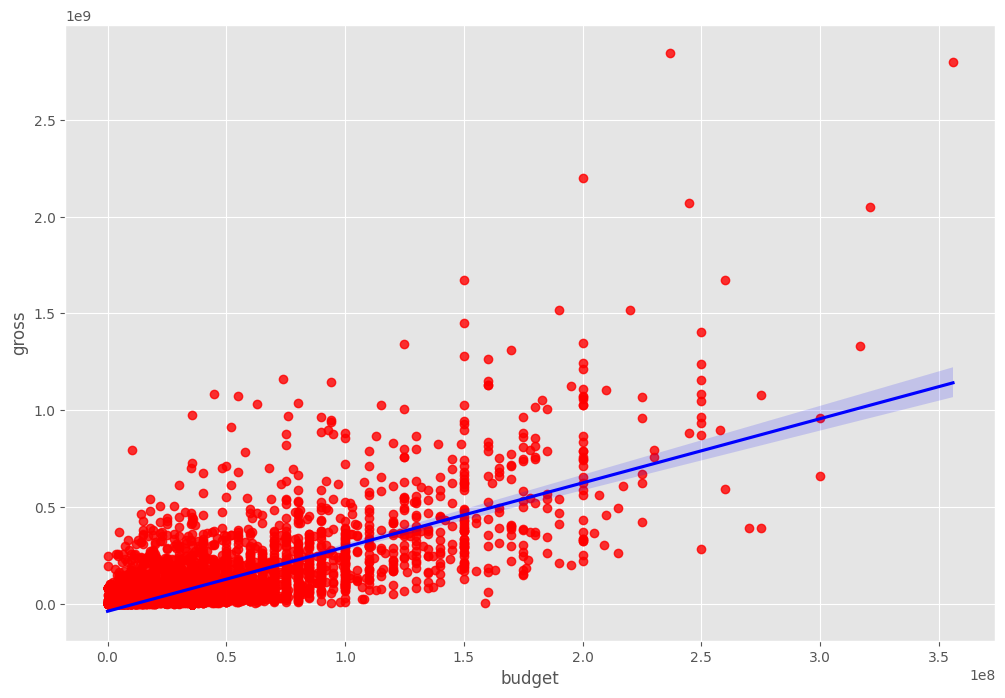

In [11]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget',y='gross', data= df_cleaned, scatter_kws={"color":"red"}, line_kws={"color":"blue"} )

In [17]:
# Let's start looking at correlation
# Different kind of correlation: pearson, kendall, spearman

df_cleaned.corr(method='pearson')

year     score     votes    budget     gross   runtime
year     1.000000  0.097936  0.222810  0.265578  0.252042  0.120766
score    0.097936  1.000000  0.409182  0.064541  0.182868  0.399329
votes    0.222810  0.409182  1.000000  0.421007  0.628713  0.309166
budget   0.265578  0.064541  0.421007  1.000000  0.711270  0.265287
gross    0.252042  0.182868  0.628713  0.711270  1.000000  0.241335
runtime  0.120766  0.399329  0.309166  0.265287  0.241335  1.000000

**High correlation between budget and gross**

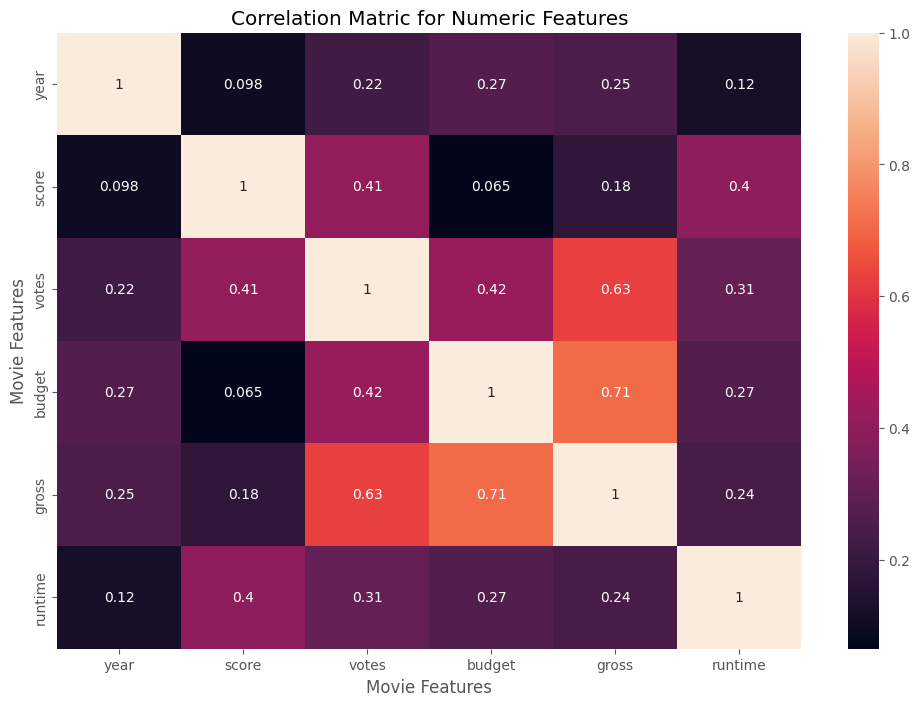

In [21]:
correlation_matrix = df_cleaned.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [22]:
# Looks at Company

df.head()

name  ... runtime
0                                     The Shining  ...   146.0
1                                 The Blue Lagoon  ...   104.0
2  Star Wars: Episode V - The Empire Strikes Back  ...   124.0
3                                       Airplane!  ...    88.0
4                                      Caddyshack  ...    98.0

[5 rows x 15 columns]

In [23]:
df_numerized = df_cleaned

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized        

name  rating  genre  year  ...       gross  company     runtime  yearcorrect
0     6587       6      6  1980  ...    46998772     2319  146.000000           14
1     5573       6      1  1980  ...    58853106      731  104.000000           13
2     5142       4      0  1980  ...   538375067     1540  124.000000           14
3      286       4      4  1980  ...    83453539     1812   88.000000           13
4     1027       6      4  1980  ...    39846344     1777   98.000000           13
5     2109       6     10  1980  ...    39754601     1812   95.000000           16
6     5574       6      0  1980  ...   115229890     2281  133.000000           14
7     4436       6      3  1980  ...    23402427      631  129.000000           10
8     5281       4      0  1980  ...   108185706      883  127.000000           14
9     6213       6      3  1980  ...    15795189     2272  100.000000           16
10     463       4      0  1980  ...    70687344     2190  116.000000           10
11    5920       4      1  1980  ...    30031783      522  109.000000           18
12    4315       4      1  1980  ...    49823037     1812  114.000000           10
13    4084       6      6  1980  ...    54766923     1812  124.000000           19
14    1687       6      5  1980  ...    31899000     1074  104.000000           13
15    5024       4      6  1980  ...     9709597     1935  103.000000           18
16    1900       6      6  1980  ...    21202829     1637  134.000000           16
17      92       4      4  1980  ...   103300686     1304  109.000000           10
18    5865       6     10  1980  ...    21448782       74   89.000000           11
19    5189       6      4  1980  ...   101300000      731  111.000000           10
20    1387       6      5  1980  ...    19814523     1532  102.000000           11
21    2451       6      1  1980  ...     3484523     1819  219.000000            8
22    5845       4      0  1980  ...    16647800      500  103.000000            9
23    7445       4      8  1980  ...    22762571     2281   96.000000            9
24    7127       4      6  1980  ...    46918287     1812  132.000000           14
25     346       6     10  1980  ...    19853892     2319  102.000000           10
26    3263       6      4  1980  ...    34326249     2126   96.000000           15
27    4442       4      0  1980  ...    78500541     1306  115.000000            9
28     980       6      5  1980  ...    37121708     2253  131.000000           14
29     362       6      5  1980  ...    22743674     1812  117.000000           11
30    3796       4      4  1980  ...    22482952     2253  102.000000           19
31    4373       6     10  1980  ...    14796236     1216   92.000000           13
32    4987       4      0  1980  ...    66132626     2281  100.000000            9
33    1103       4      6  1980  ...      534816      603   97.000000            8
34    4785       4      4  1980  ...    43995918     1934  102.000000           10
35    4362       6      4  1980  ...    69847348     2319  109.000000           18
36    6008       6      4  1980  ...    10000000     1869   91.000000           16
37    3721       6      4  1980  ...     6342668      552  101.000000           18
38    6102       4      6  1980  ...    27118000      899  115.000000           10
39    1244       4      3  1980  ...    67182787     2281  124.000000           15
40    6748       4      7  1980  ...     5000000     2317   84.000000           18
41     927       4      6  1980  ...    78500541     2202  107.000000           13
42    6644       6      0  1980  ...     7063886     1628  131.000000           14
43    7305       6      3  1980  ...     6659377     2281   99.000000            8
44    5504       6     10  1980  ...     8415112      899  101.000000           18
45    1152       6      4  1980  ...    41675194     2281   99.000000           13
46    6094       6      0  1980  ...    15716828     2281  109.000000           14
47    5578       6    

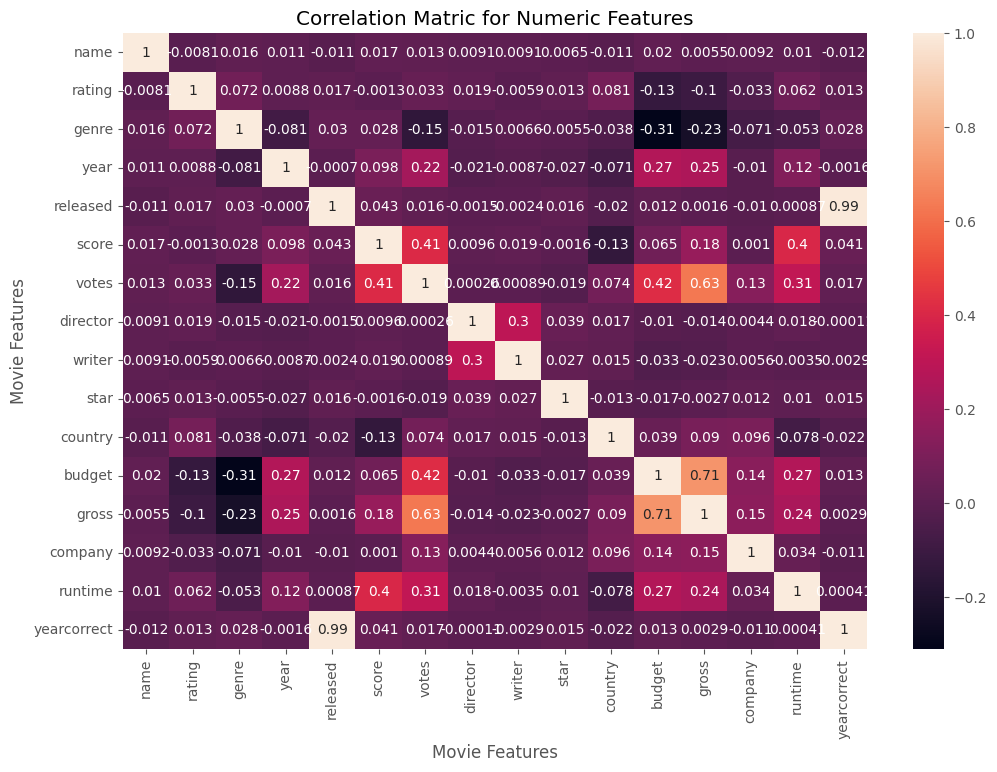

In [24]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [25]:
df_numerized.corr()

name    rating     genre  ...   company   runtime  yearcorrect
name         1.000000 -0.008069  0.016355  ...  0.009211  0.010390    -0.011725
rating      -0.008069  1.000000  0.072423  ... -0.032943  0.062051     0.013475
genre        0.016355  0.072423  1.000000  ... -0.071067 -0.052699     0.028397
year         0.011453  0.008779 -0.081261  ... -0.010431  0.120766    -0.001562
released    -0.011311  0.016613  0.029822  ... -0.010474  0.000867     0.993694
score        0.017095 -0.001310  0.027959  ...  0.001030  0.399329     0.040983
votes        0.013086  0.033127 -0.145276  ...  0.133129  0.309166     0.017333
director     0.009079  0.019483 -0.015258  ...  0.004404  0.017624    -0.000105
writer       0.009081 -0.005921  0.006567  ...  0.005646 -0.003510    -0.002892
star         0.006472  0.013405 -0.005477  ...  0.012442  0.010171     0.015406
country     -0.010737  0.081244 -0.037615  ...  0.095548 -0.078297    -0.022277
budget       0.020368 -0.126046 -0.310566  ...  0.144851  0.265287     0.013096
gross        0.005466 -0.102116 -0.230267  ...  0.152694  0.241335     0.002904
company      0.009211 -0.032943 -0.071067  ...  1.000000  0.034383    -0.010726
runtime      0.010390  0.062051 -0.052699  ...  0.034383  1.000000     0.000410
yearcorrect -0.011725  0.013475  0.028397  ... -0.010726  0.000410     1.000000

[16 rows x 16 columns]

In [27]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017095
             votes          0.013086
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020368
             gross          0.005466
             company        0.009211
             runtime        0.010390
             yearcorrect   -0.011725
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001310
             votes          0.033127
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [28]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.310566
budget       genre         -0.310566
genre        gross         -0.230267
gross        genre         -0.230267
votes        genre         -0.145276
genre        votes         -0.145276
country      score         -0.133343
score        country       -0.133343
rating       budget        -0.126046
budget       rating        -0.126046
gross        rating        -0.102116
rating       gross         -0.102116
genre        year          -0.081261
year         genre         -0.081261
runtime      country       -0.078297
country      runtime       -0.078297
genre        company       -0.071067
company      genre         -0.071067
country      year          -0.070938
year         country       -0.070938
runtime      genre         -0.052699
genre        runtime       -0.052699
             country       -0.037615
country      genre         -0.037615
budget       writer        -0.033216
writer       budget        -0.033216
rating       company       -0.032943
c

In [29]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes        gross          0.628713
gross        votes          0.628713
             budget         0.711270
budget       gross          0.711270
released     yearcorrect    0.993694
yearcorrect  released       0.993694
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

### Votes and budget have the highest correlation to gross earnings 